<a href="https://colab.research.google.com/github/laksamanaa/admiralm/blob/master/AdmiralMuhamad_PBB2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

In [0]:
# untuk mengimpor modul yang dibutuhkan
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt


pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [14]:
# untuk impor file nya
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# untuk skala nilai dari kolom median_house_value 
# agar tidak terlalu besar nilainya
training_df["median_house_value"] /= 1000.0

# untuk print data dari flie .csv lima baris pertama
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [5]:
# untuk mencari statistik dari dataset
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [7]:
# Kode buat bkin model tf sama train model tf
def build_model(my_learning_rate):

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch

  hist = pd.DataFrame(history.history)


  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [26]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):

  # label tiap sumbu x=feature, y=label
  plt.xlabel(feature)
  plt.ylabel(label)

  # Membuat plot acak dari 200 data random
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])


  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  plt.show()


def plot_the_loss_curve(epochs, rmse):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 1s 934us/step - loss: 3411012.0000 - root_mean_squared_error: 1846.8926
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 28183.4434 - root_mean_squared_error: 167.8793
Epoch 3/30
567/567 [==============================] - 1s 959us/step - loss: 27351.7734 - root_mean_squared_error: 165.3837
Epoch 4/30
567/567 [==============================] - 1s 915us/step - loss: 26749.4551 - root_mean_squared_error: 163.5526
Epoch 5/30
567/567 [==============================] - 1s 942us/step - loss: 25964.6289 - root_mean_squared_error: 161.1354
Epoch 6/30
567/567 [==============================] - 1s 951us/step - loss: 25473.3926 - root_mean_squared_error: 159.6039
Epoch 7/30
567/567 [==============================] - 1s 936us/step - loss: 24754.1680 - root_mean_squared_error: 157.3346
Epoch 8/30
567/567 [==============================] - 1s 953us/step - loss: 24104.0117 - root_mean_squared_error: 155.2547
Epoch 9/30
567/

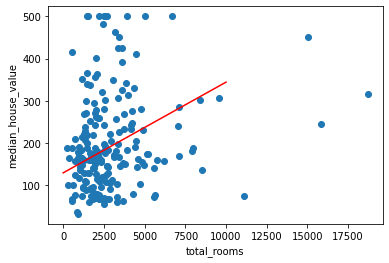

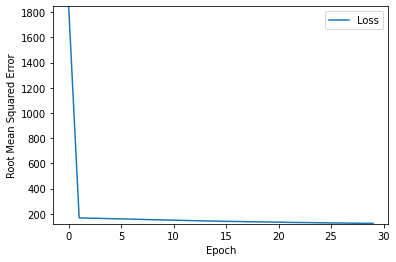

In [27]:
learning_rate = 0.01
epochs = 30
batch_size = 30

my_feature = "total_rooms"
my_label="median_house_value"


my_model = None

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [0]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [29]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             172
 3400     92             203
 3677     69             209
 2202     62             177
 2403     80             181
 5652    295             251
 3318    500             201
 2552    342             185
 1364    118             159
 3468    128             204


Epoch 1/15
340/340 [==============================] - 0s 921us/step - loss: 40352.0078 - root_mean_squared_error: 200.8781
Epoch 2/15
340/340 [==============================] - 0s 930us/step - loss: 35956.5508 - root_mean_squared_error: 189.6221
Epoch 3/15
340/340 [==============================] - 0s 936us/step - loss: 31965.2109 - root_mean_squared_error: 178.7882
Epoch 4/15
340/340 [==============================] - 0s 938us/step - loss: 30151.3672 - root_mean_squared_error: 173.6415
Epoch 5/15
340/340 [==============================] - 0s 947us/step - loss: 27617.4629 - root_mean_squared_error: 166.1850
Epoch 6/15
340/340 [==============================] - 0s 980us/step - loss: 26829.6406 - root_mean_squared_error: 163.7976
Epoch 7/15
340/340 [==============================] - 0s 1ms/step - loss: 25576.2734 - root_mean_squared_error: 159.9258
Epoch 8/15
340/340 [==============================] - 0s 1ms/step - loss: 24640.4121 - root_mean_squared_error: 156.9726
Epoch 9/15
340/340 [

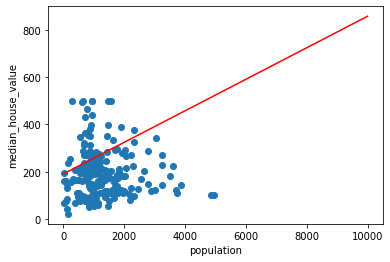

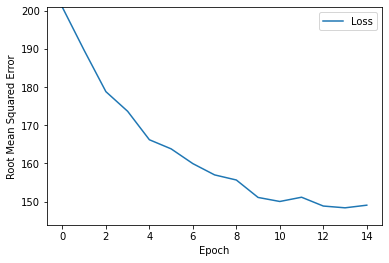

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             277
 1867     92             315
 2191     69             337
 1052     62             261
 1647     80             301
 2312    295             345
 1604    500             298
 1066    342             262
  338    118             214
 1604    128             298
 1200    187             271
  292     80             211
 2014    112             325
 1817     95             312
 1328     69             280


In [34]:
my_feature = "population"

# saya ganti hyperparameter nya
# learning_rate untuk meminimalkan loss
# epoch untuk berapa kali model mengulangi perhitungan dataset
# batch_size menentukan jumlah teaining example dalam satu batch
learning_rate = 0.1
epochs = 15
batch_size = 50

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Epoch 1/25
425/425 [==============================] - 0s 1ms/step - loss: 16022.1631 - root_mean_squared_error: 126.5787
Epoch 2/25
425/425 [==============================] - 0s 940us/step - loss: 13338.9248 - root_mean_squared_error: 115.4943
Epoch 3/25
425/425 [==============================] - 0s 917us/step - loss: 13082.6260 - root_mean_squared_error: 114.3793
Epoch 4/25
425/425 [==============================] - 0s 918us/step - loss: 13051.6982 - root_mean_squared_error: 114.2440
Epoch 5/25
425/425 [==============================] - 0s 941us/step - loss: 13169.9619 - root_mean_squared_error: 114.7605
Epoch 6/25
425/425 [==============================] - 0s 908us/step - loss: 13068.7920 - root_mean_squared_error: 114.3188
Epoch 7/25
425/425 [==============================] - 0s 1ms/step - loss: 13057.7793 - root_mean_squared_error: 114.2706
Epoch 8/25
425/425 [==============================] - 1s 1ms/step - loss: 13038.4014 - root_mean_squared_error: 114.1858
Epoch 9/25
425/425 [==

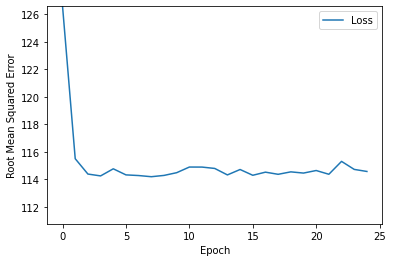

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             198
    2     92             208
    2     69             203
    2     62             217
    1     80             196
    2    295             228
    2    500             216
    2    342             226
    4    118             279
    2    128             219
    2    187             227
    3     80             235
    2    112             228
    2     95             223
    2     69             216


In [36]:
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]

my_feature = "rooms_per_person"

learning_rate = 1
epochs = 25
batch_size = 40

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

In [37]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0
